#### Loading required libraries

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Data

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1276,1277,60,RL,NaN,12936,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,162000
1193,1194,120,RM,NaN,4500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,165000
599,600,160,RM,24.0,1950,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2008,COD,Normal,151000


In [4]:
df.shape

(1460, 81)

### EDA

In [5]:
# Creating a function to read the data dictionary file coming with the dataset
def read_description(file_name):
    f = open(file_name, "r")
    
    lines = f.readlines()

    for i in lines:
        print(i)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [60]:
read_description("data_description.txt")

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

In [3]:
# Encoding the MSSubClass variable, which identifies the type of dwelling involved in the sale, as a categorical feature.
df['MSSubClass'] = df['MSSubClass'].astype('category')

In [4]:
# Rearranging columns'order
continuous_features = ['SalePrice','LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 
'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea', 'GarageArea', 
'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch', 
'PoolArea','MiscVal']
discrete_features = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageCars']
nominal_features = ['MSSubClass','MSZoning', 'Street', 'Alley','LotShape', 'LandContour', 
'Utilities','LotConfig','LandSlope', 'Neighborhood','Condition1', 'Condition2', 
'BldgType','HouseStyle','RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 
'MasVnrType','Foundation', 'Heating', 'CentralAir', 'Electrical', 'SaleType', 
'SaleCondition','Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
'MiscFeature']
ordinal_features = ['OverallQual','OverallCond','ExterQual','ExterCond', 'BsmtQual', 
'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
'HeatingQC','KitchenQual', 'FireplacesQu', 'GarageQual', 'GarageCond', 'PoolQC', 
'Fence', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold' ]

new_columns_order = continuous_features + discrete_features + nominal_features + \
                    ordinal_features

df = df.reindex(columns=new_columns_order)

df.head(3)

,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,FireplacesQu,GarageQual,GarageCond,PoolQC,Fence,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,208500,65.0,8450,196.0,706,0,150,856,856,854,...,NaN,TA,TA,NaN,NaN,2003,2003,2003.0,2,2008
1,181500,80.0,9600,0.0,978,0,284,1262,1262,0,...,NaN,TA,TA,NaN,NaN,1976,1976,1976.0,5,2007
2,223500,68.0,11250,162.0,486,0,434,920,920,866,...,NaN,TA,TA,NaN,NaN,2001,2002,2001.0,9,2008


> #### Univariate Exploratory Analysis on numeric features

In [6]:
df[continuous_features].describe()

,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,79442.502883,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,34900.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129975.000000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,163000.000000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,214000.000000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,755000.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [7]:
# Defining a function to plot multiple histograms at once
def histograms (df, features, rows, cols, hfig, wfig):
    fig = plt.figure(figsize = (hfig,wfig))
    for i, feature_name in enumerate(features):
        ax = fig.add_subplot(rows, cols, i +1)
        df[feature_name].hist(bins = 15);
    fig.tight_layout()

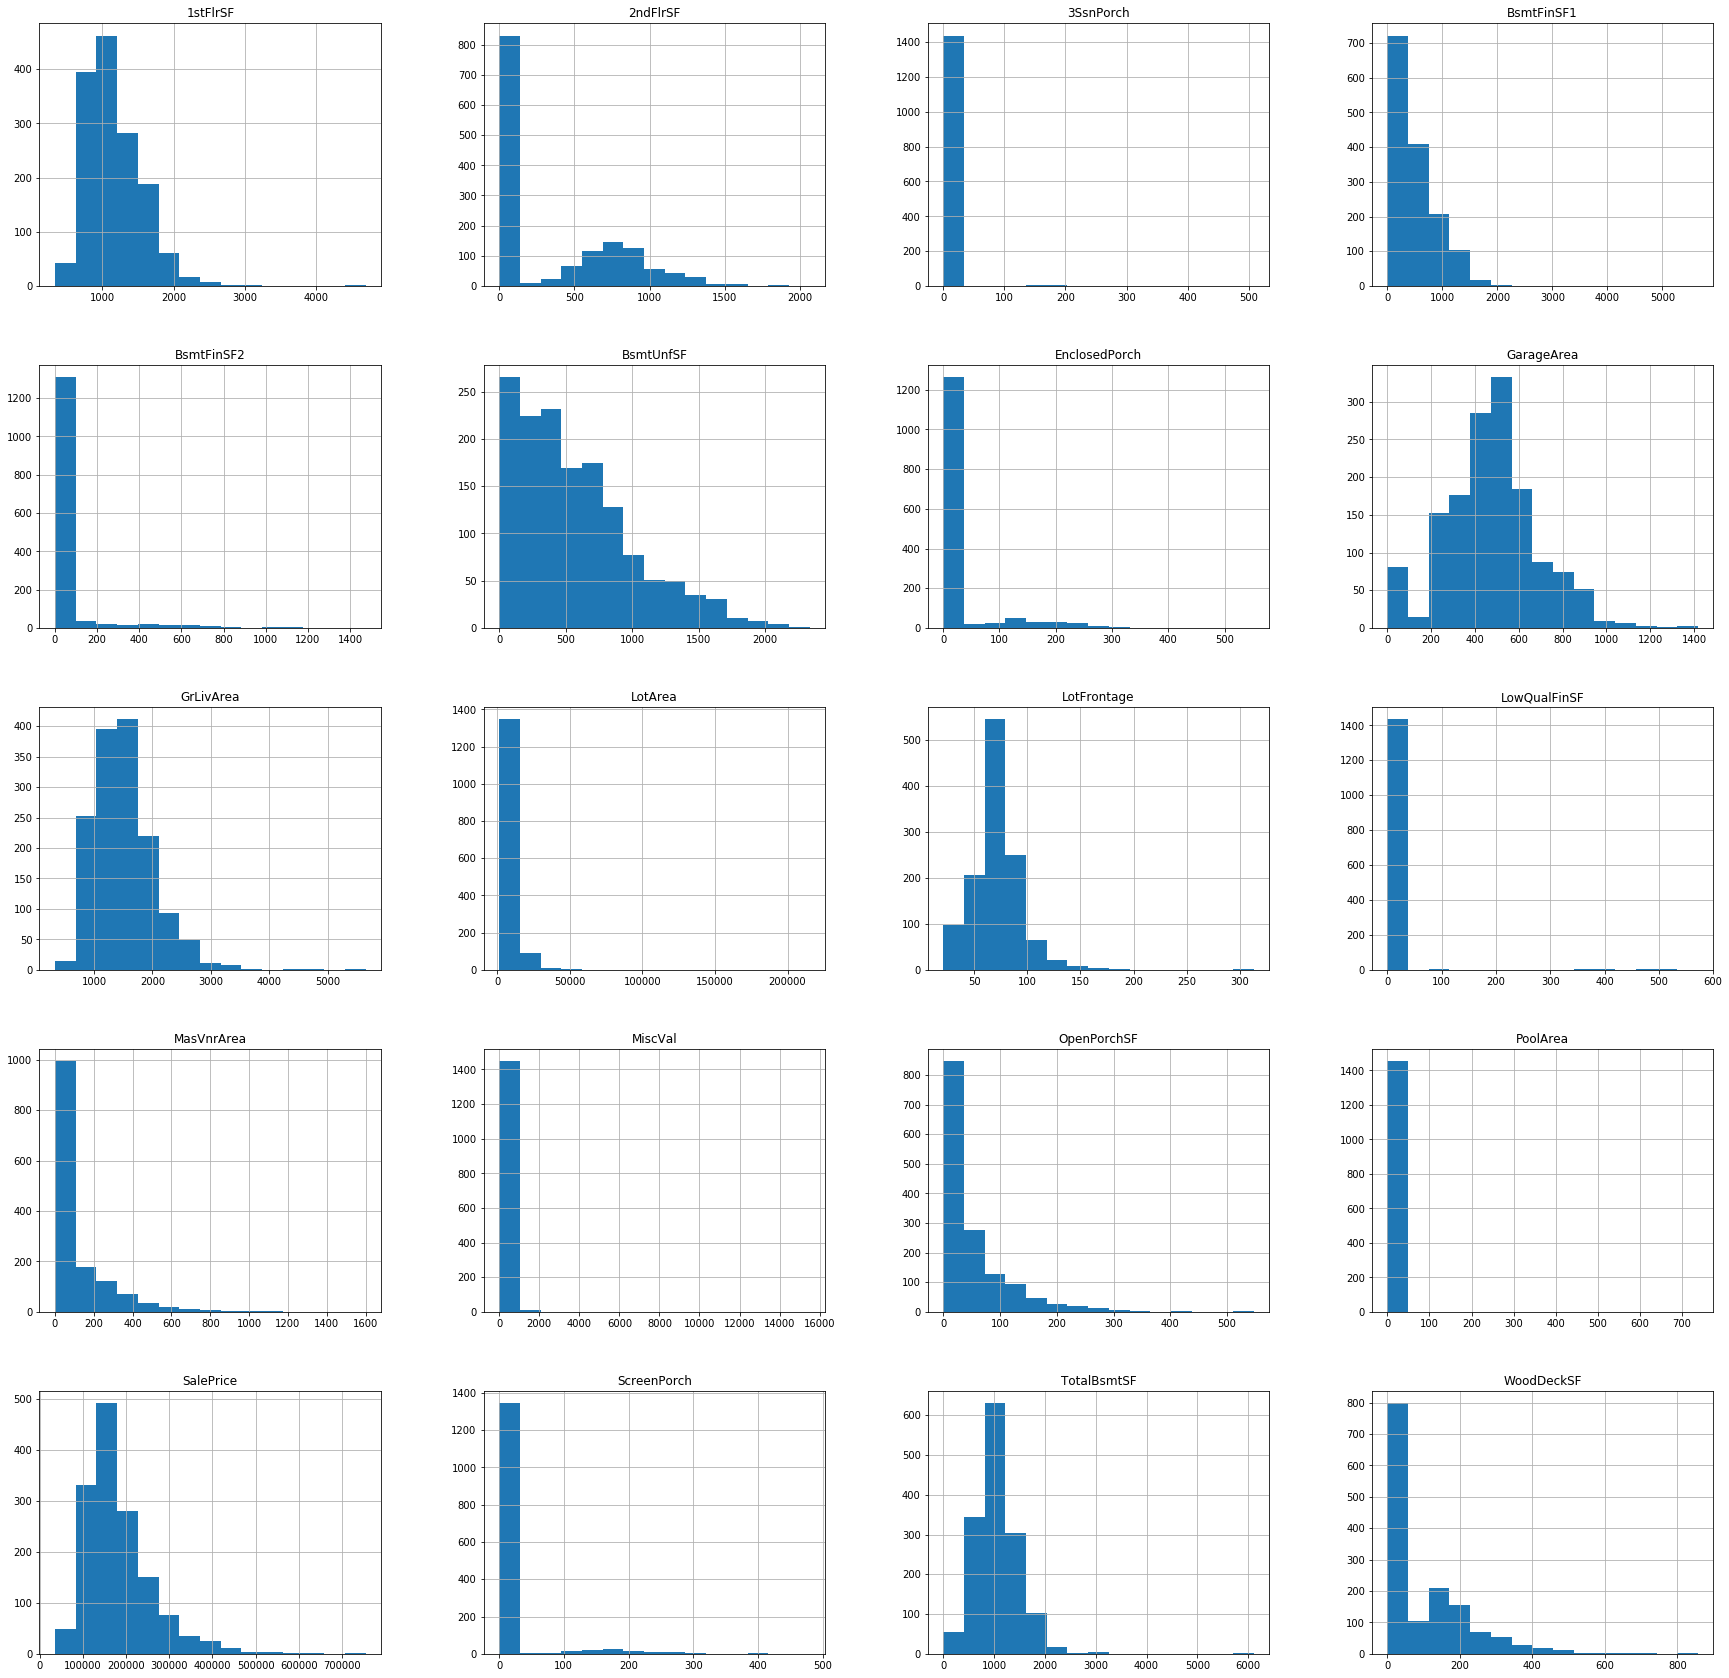

In [8]:
df[continuous_features].hist(figsize = (30,30), bins = 15);

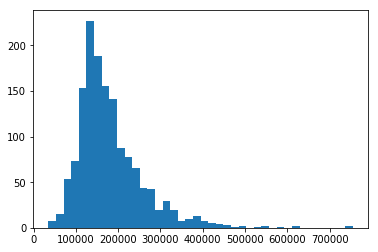

In [637]:
plt.hist(df['SalePrice'], bins = 40);

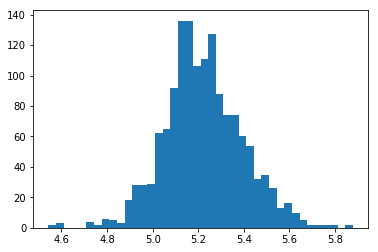

In [65]:
# Transforming Target Variable
df['SalePrice'] = np.log10(df['SalePrice'])
plt.hist(df['SalePrice'], bins = 40);

In [475]:
df[discrete_features].describe()

,MSSubClass,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123
std,42.300571,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000
50%,50.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000
75%,70.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000
max,190.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000


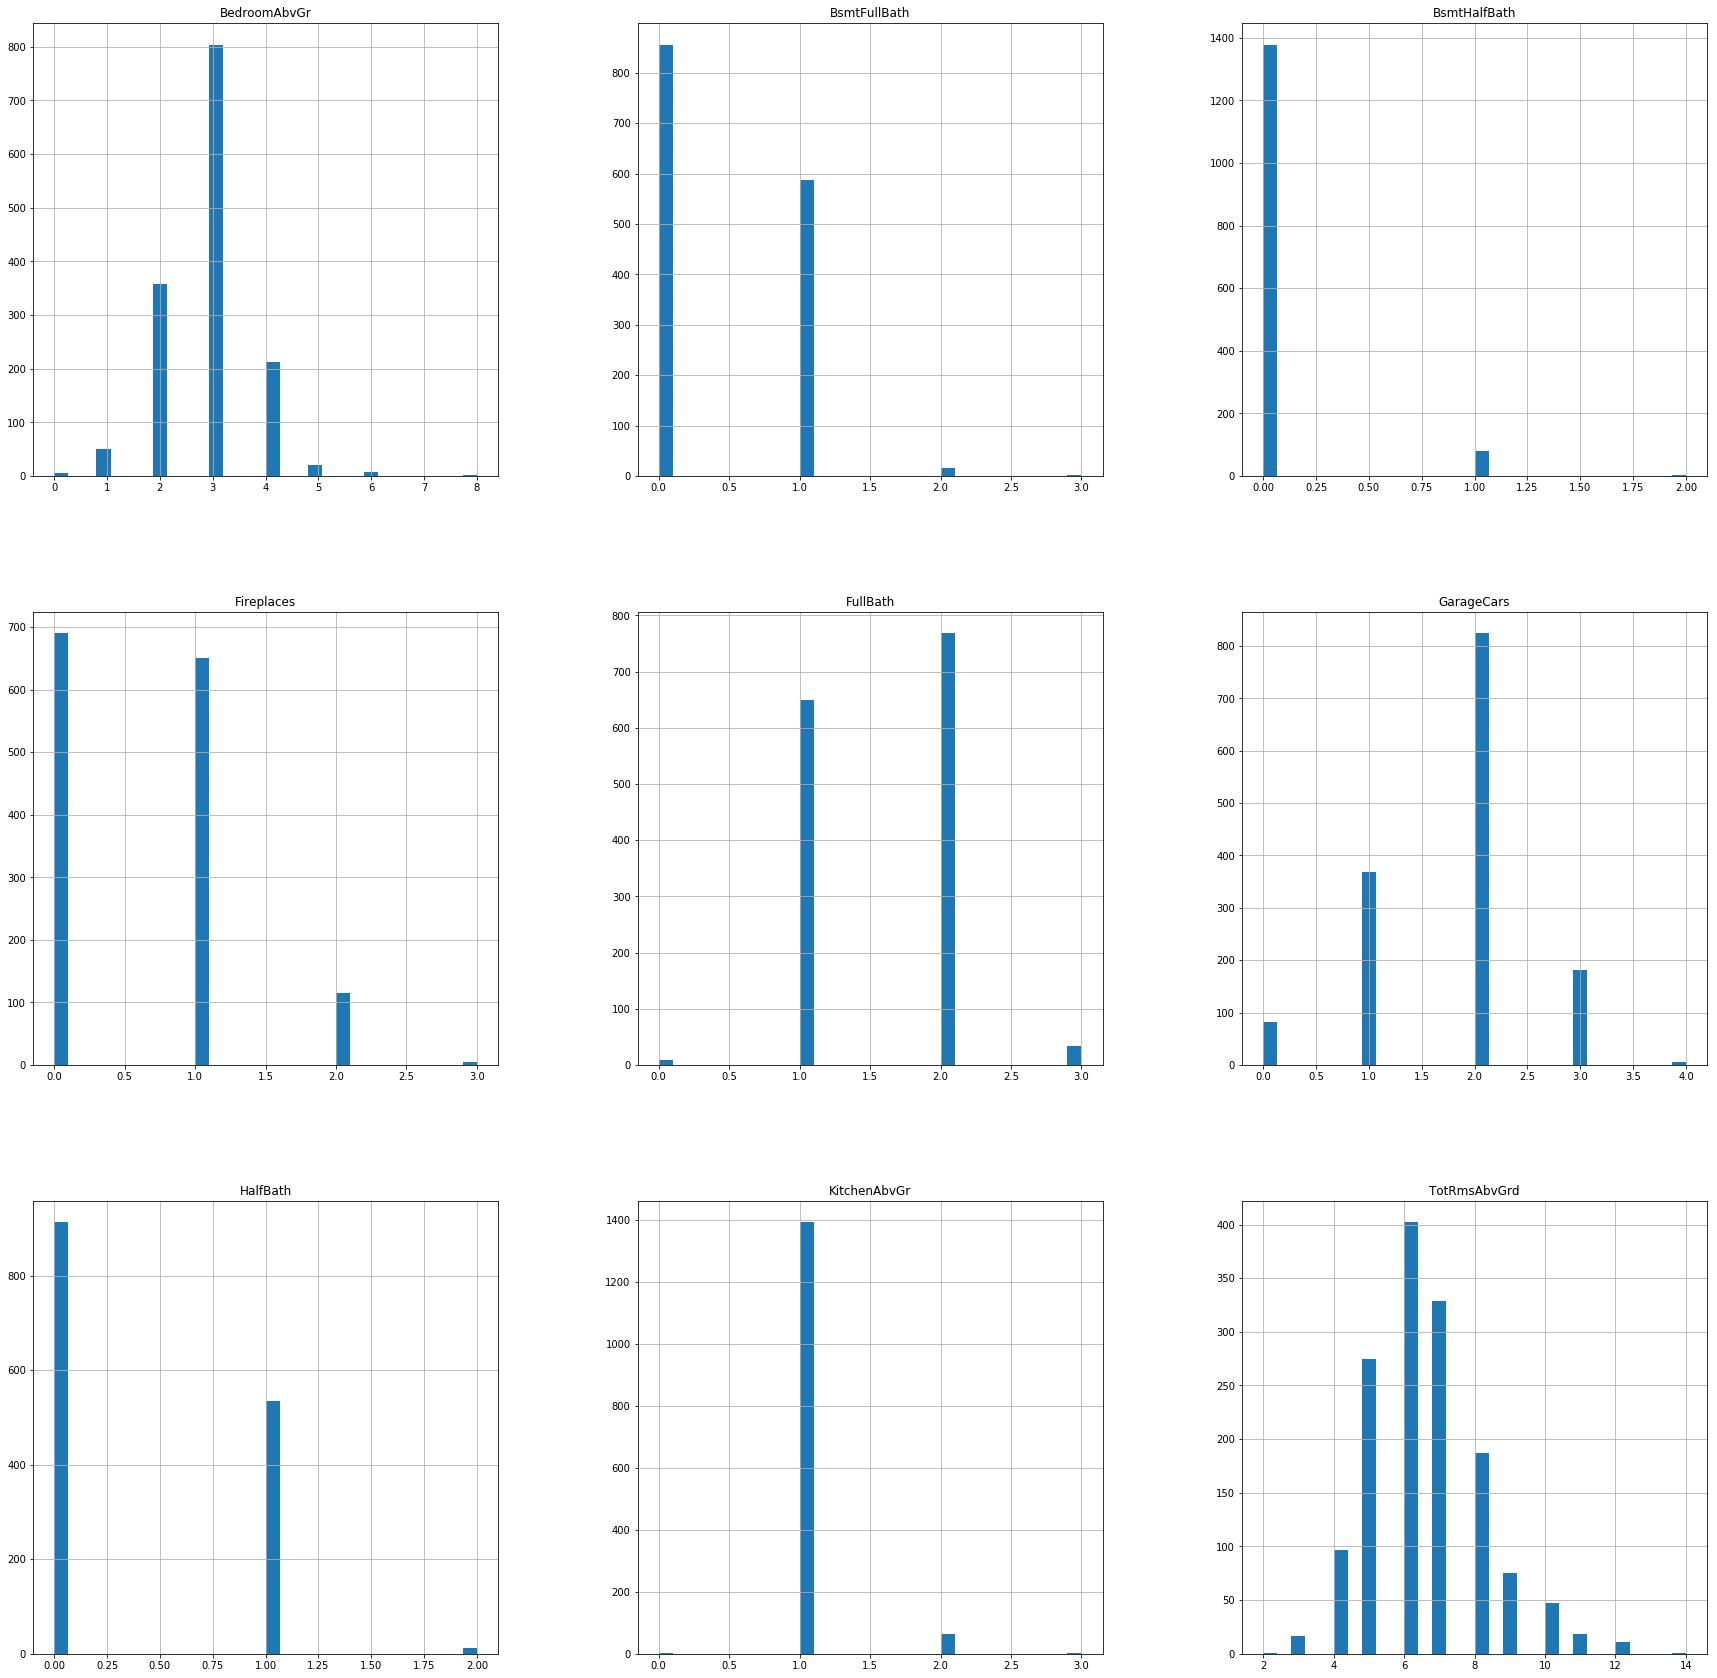

In [226]:
df[discrete_features].hist(figsize = (30,30), bins = 30);

> #### Univariate Exploratory Analysis on categorical features

In [12]:
# # Defining a function to plot multiple barplots at once
def bar_plot (df, features, rows, cols, hfig, wfig):
    fig = plt.figure(figsize = (hfig,wfig))
    for i, feature_name in enumerate(features):
        ax = fig.add_subplot(rows, cols, i +1)
        sns.countplot(x = feature_name, data = df)
        plt.xticks(rotation = 90);
    fig.tight_layout()

**Nominal variables** analysis by groups

In [5]:
location = ['MSZoning','Condition1', 'Condition2', 'Neighborhood']

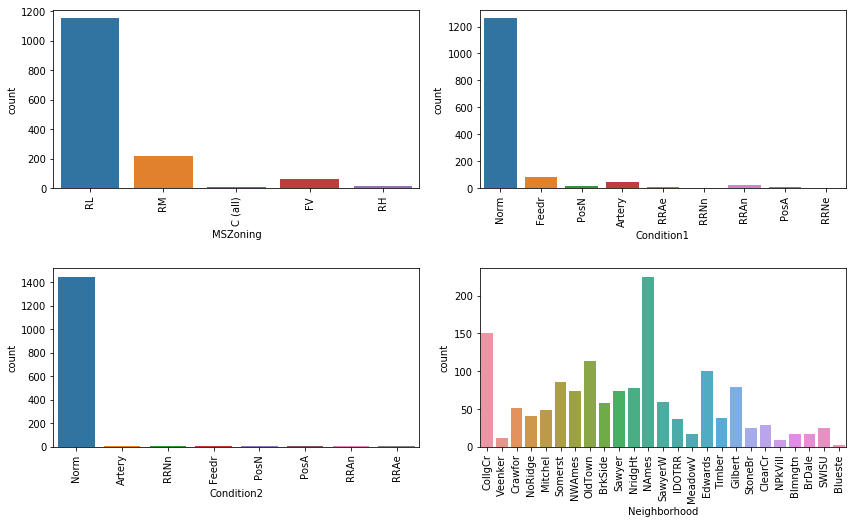

In [290]:
bar_plot (df, location, int(len(location)/2)+1, 2, 12, 10)

In [6]:
strucCaractProp = ['LotShape','LandContour', 'LandSlope', 'LotConfig',\
                         'Street', 'Alley', 'PavedDrive', 'GarageType', 'GarageFinish']


strucCaractDwel = ['MSSubClass','BldgType','HouseStyle','Foundation','RoofStyle','RoofMatl',\
                         'MasVnrType', 'Exterior1st', 'Exterior2nd']

utilities = ['Utilities','Heating', 'CentralAir', 'Electrical', 'MiscFeature','Functional']

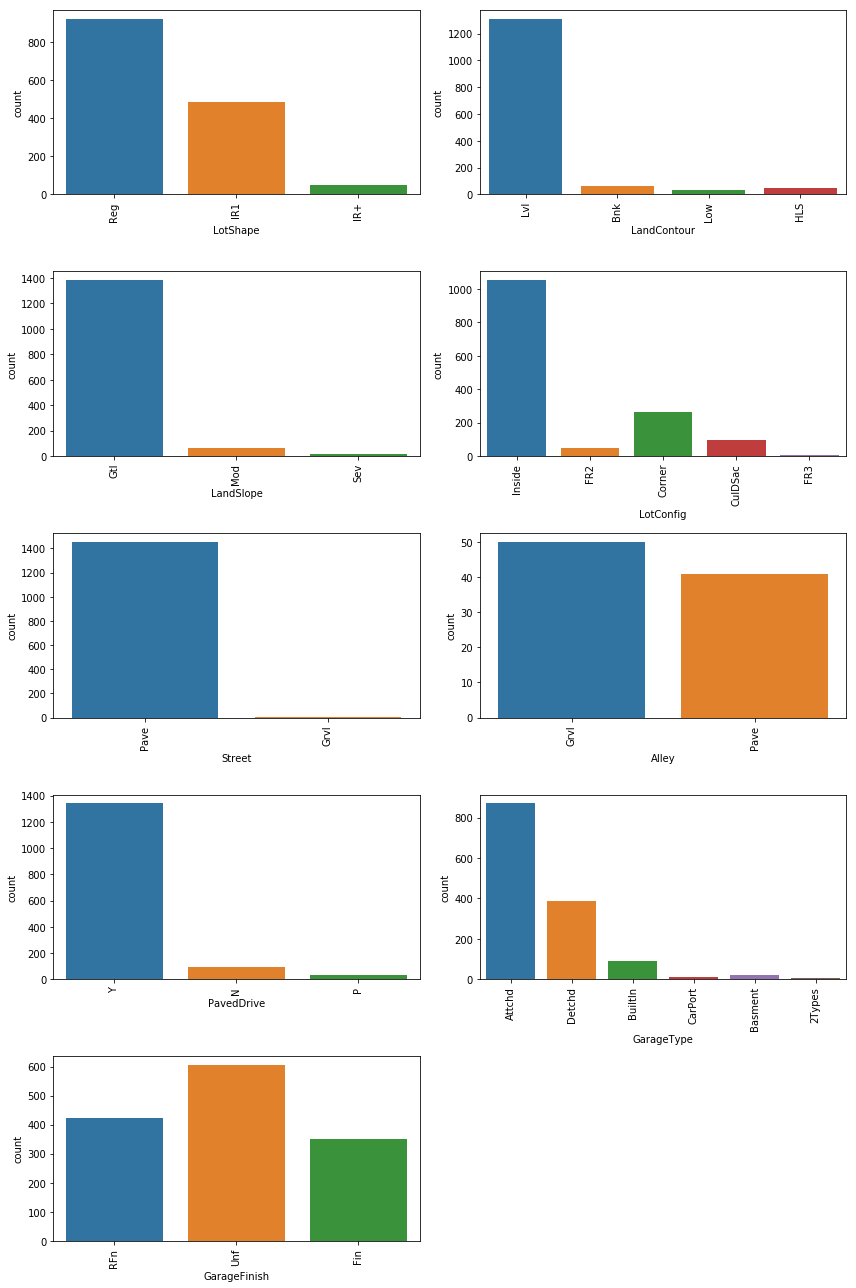

In [291]:
bar_plot (df, strucCaractProp, int(len(strucCaractProp)/2)+1, 2, 12, 18)

In [7]:
# Regrouping low frequency categories for the variable LotShape into a new category “Irr+”.
df.loc[(df.LotShape == 'IR2'),'LotShape'] ='IR+'
df.loc[(df.LotShape == 'IR3'),'LotShape'] ='IR+'

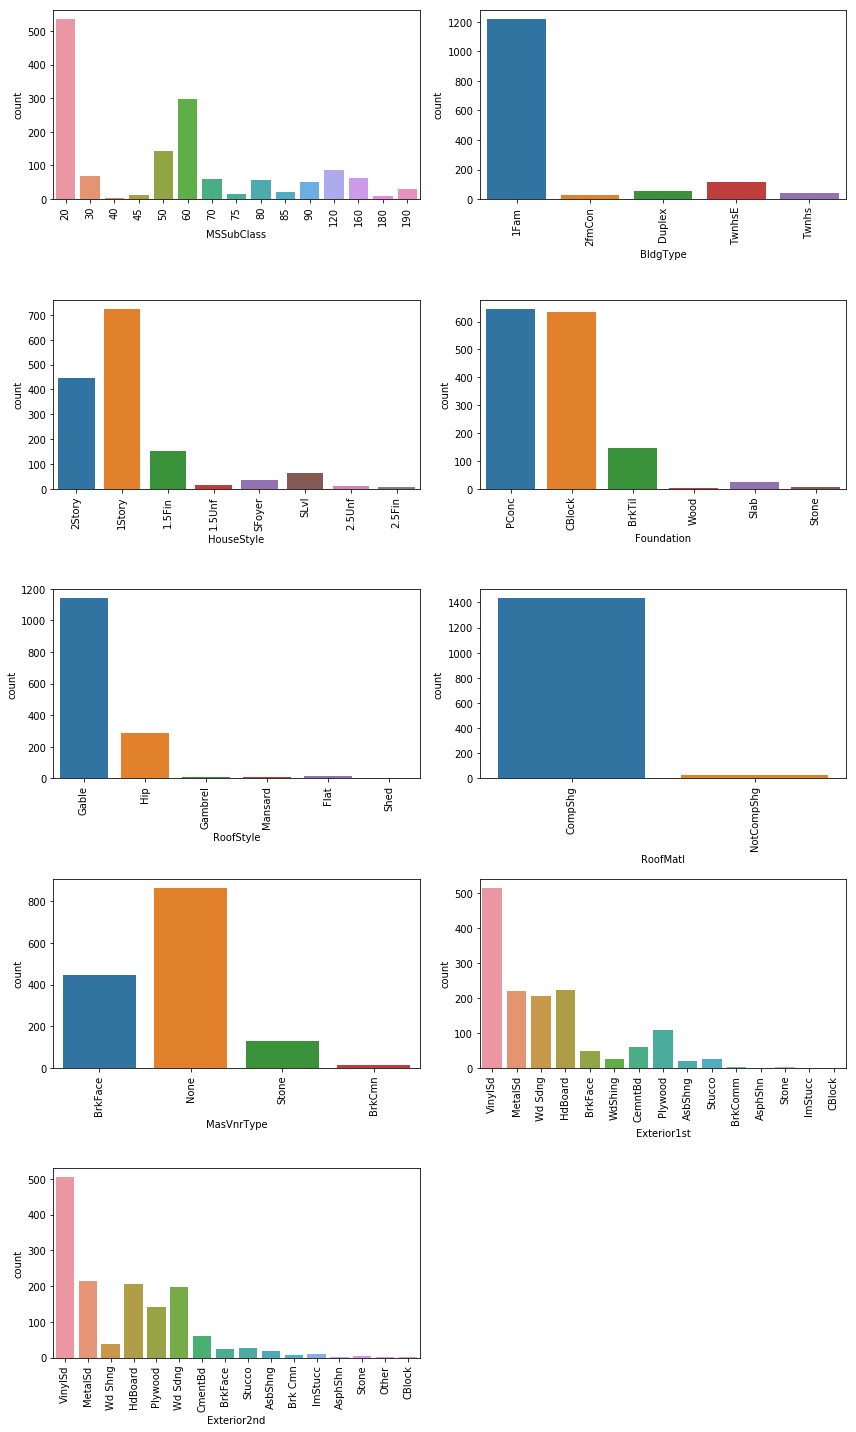

In [292]:
bar_plot (df, strucCaractDwel, int(len(strucCaractDwel)/2)+1, 2, 12, 20)

In [8]:
# Regrouping low frequency categories of the variable RoofMatl into a NotCompShg category.
df.loc[df['RoofMatl'] != 'CompShg', 'RoofMatl'] = 'NotCompShg'

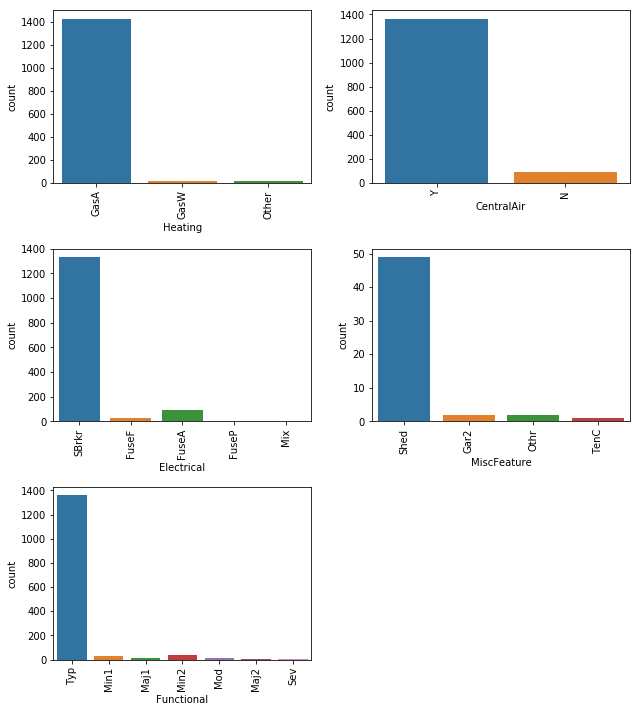

In [293]:
bar_plot (df, utilities, int(len(utilities)/2)+1, 2, 9, 10)

In [9]:
# Dropping ‘Utilities’ feature
df.drop('Utilities', axis = 1, inplace = True)

In [10]:
# Group low frequency categories of the variable 'Heating' into an 'other' class
other = {'Grav': 'Other', 'Wall': 'Other', 'OthW': 'Other', 'Floor': 'Other'}
df['Heating'].replace(other, inplace = True)

In [11]:
sale = ['SaleType','SaleCondition']

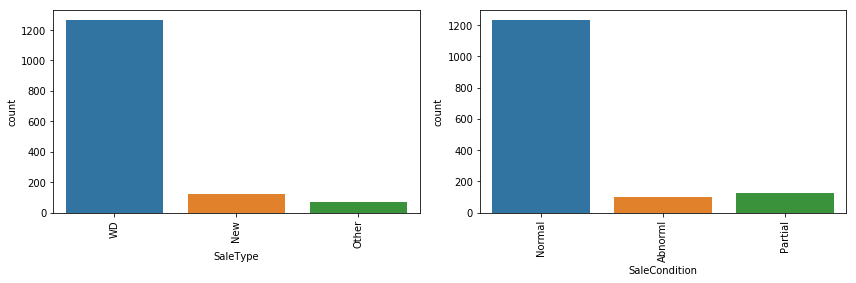

In [294]:
bar_plot (df,sale,2, 2, 12, 7)

In [12]:
# Regrouping low frequency categories of the variable 'SaleType' into an 'Other' class
otherType = {'COD': 'Other', 'ConLD': 'Other', 'ConLw': 'Other', 'ConLI': 'Other', 'CWD': 'Other',\
             'Oth': 'Other', 'Con': 'Other'}

df['SaleType'].replace(otherType, inplace = True)

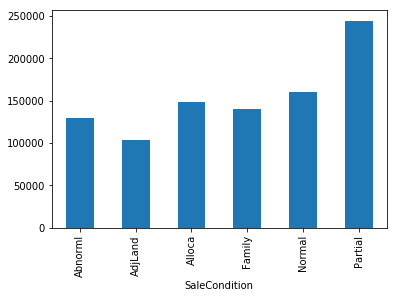

In [15]:
# Median sale price across different conditions of sale
df.groupby('SaleCondition')['SalePrice'].median().plot(kind = 'bar');

In [13]:
# Regrouping non significative category into the Normal category
otherCond = {'AdjLand':'Normal', 'Alloca':'Normal', 'Family':'Normal'}

df['SaleCondition'].replace(otherCond, inplace = True)

In [14]:
# Redifining nominal_feature's group
utilities  = ['Heating', 'CentralAir', 'Electrical', 'MiscFeature','Functional']
nominal_features = location + strucCaractProp + strucCaractDwel + utilities + sale

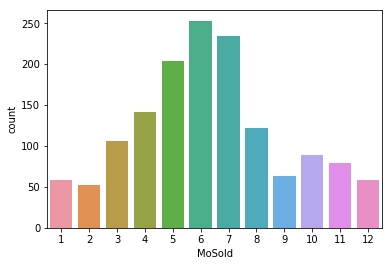

In [718]:
sns.countplot(df['MoSold']);


In [15]:
# Computing House's age
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

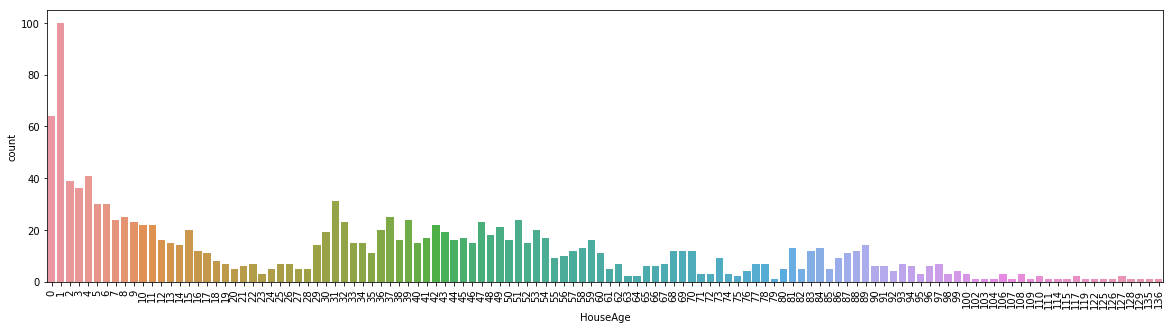

In [719]:
plt.figure(figsize = (20,5))
sns.countplot(df['HouseAge'])
plt.xticks(rotation = 90);

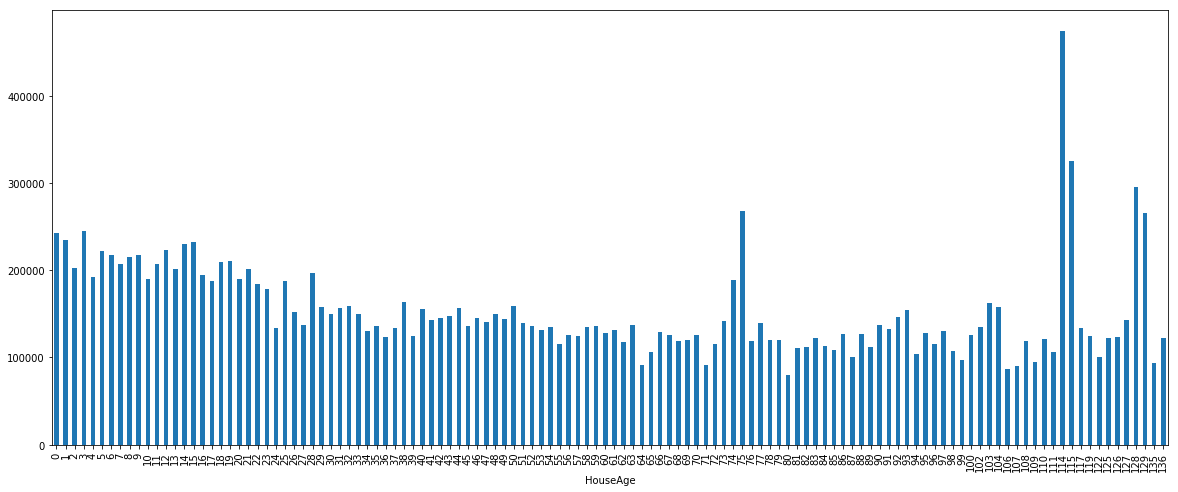

In [145]:
# visualizing the variability of the median price of sale based on the house age
df.groupby("HouseAge")['SalePrice'].median().plot(kind = 'bar', figsize = (20,8))

> #### Bivariate Exploratory Analysis on numeric features

In [50]:
# Defining a function to plot multiple scatterplots at once
def scatters (df, features, rows, cols):
    fig = plt.figure(figsize = (10,30))
    for i, feature_name in enumerate(features):
        ax = fig.add_subplot(rows, cols, i +1)
        sns.regplot(x = feature_name, y= 'SalePrice', data = df);
    fig.tight_layout()

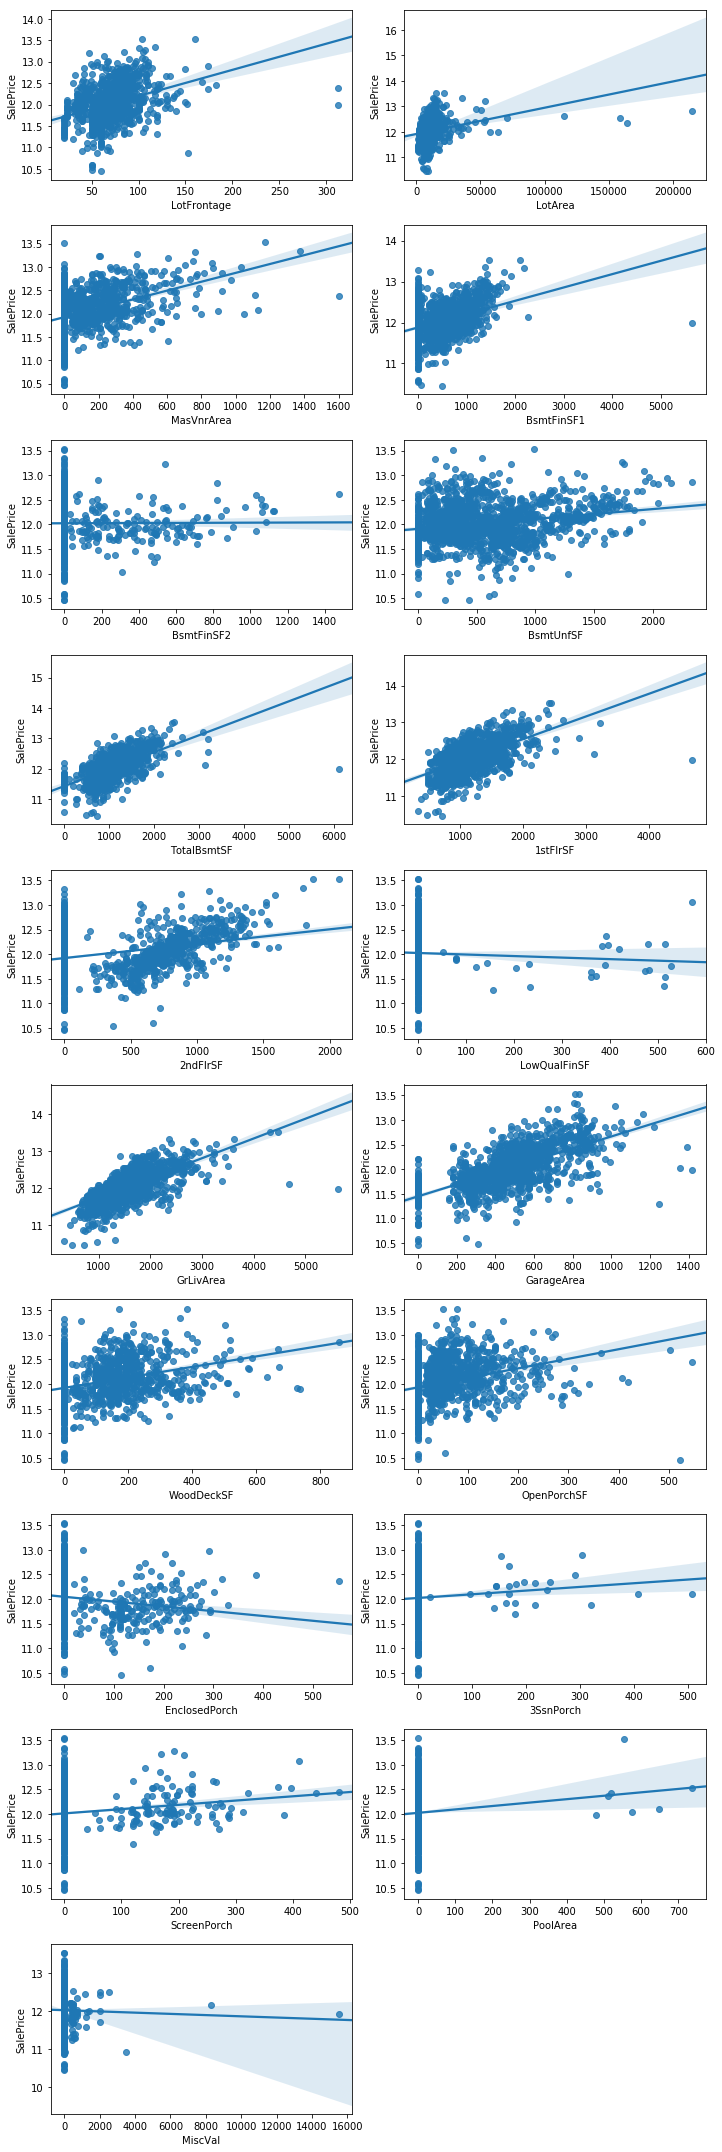

In [51]:
scatters(df, continuous_features[1:], int(len(continuous_features[1:])/2)+1,2)

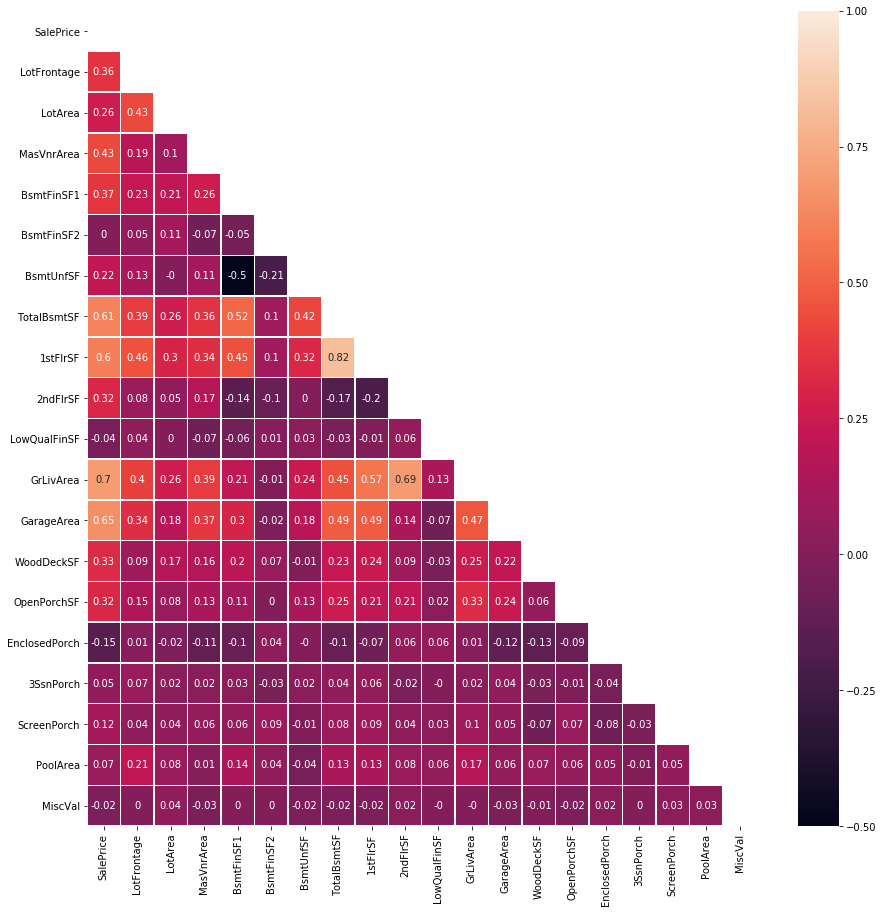

In [52]:
corr_continuous = round(df[continuous_features].corr(),2)
plt.figure(figsize= (15, 15))
mask = np.zeros_like(corr_continuous, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True;
sns.heatmap(corr_continuous, mask=mask, annot = True, linewidths=.5);
#plt.savefig("corrMatrix.png")

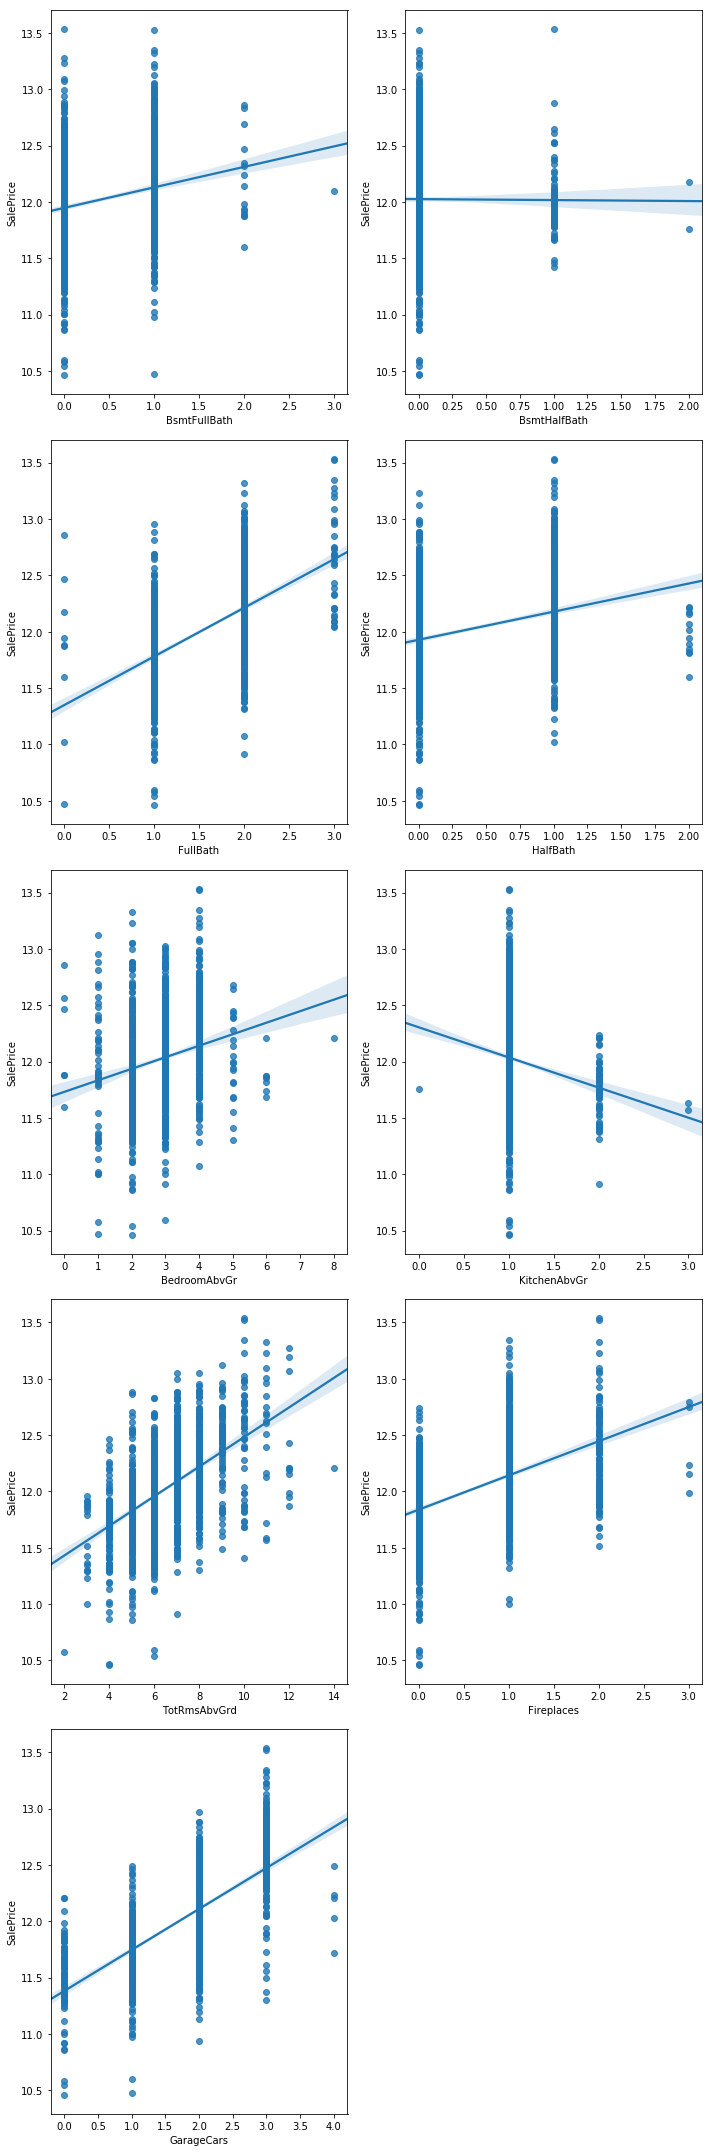

In [53]:
scatters(df, discrete_features, int(len(discrete_features)/2)+1,2);

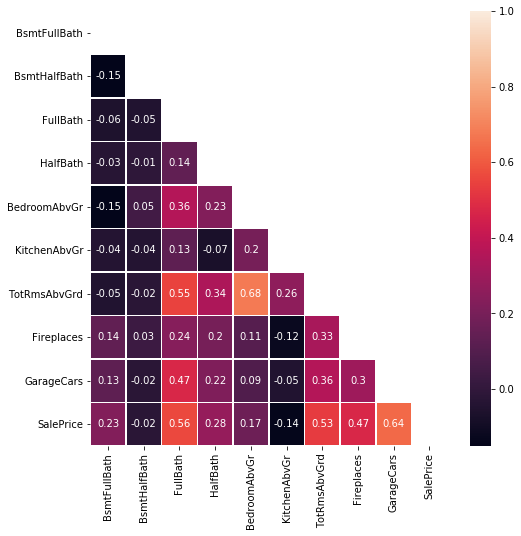

In [302]:
corr_discrete = round(df[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',\
                          'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','SalePrice']].corr(),2)
plt.figure(figsize= (8, 8))
mask = np.zeros_like(corr_discrete, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True;
sns.heatmap(corr_discrete, mask=mask, annot = True, linewidths=.5);

> #### Visualizing relationships between categorical features and target variable 


In [22]:
# Defining a function to plot multiple boxplot at once
def boxplots (df, features, rows, cols):
    fig = plt.figure(figsize = (15,70))
    for i, feature_name in enumerate(features):
        ax = fig.add_subplot(rows, cols, i +1)
        sns.boxplot(x = feature_name, y= 'SalePrice', data = df)
        plt.xticks(rotation = 90);
    fig.tight_layout()

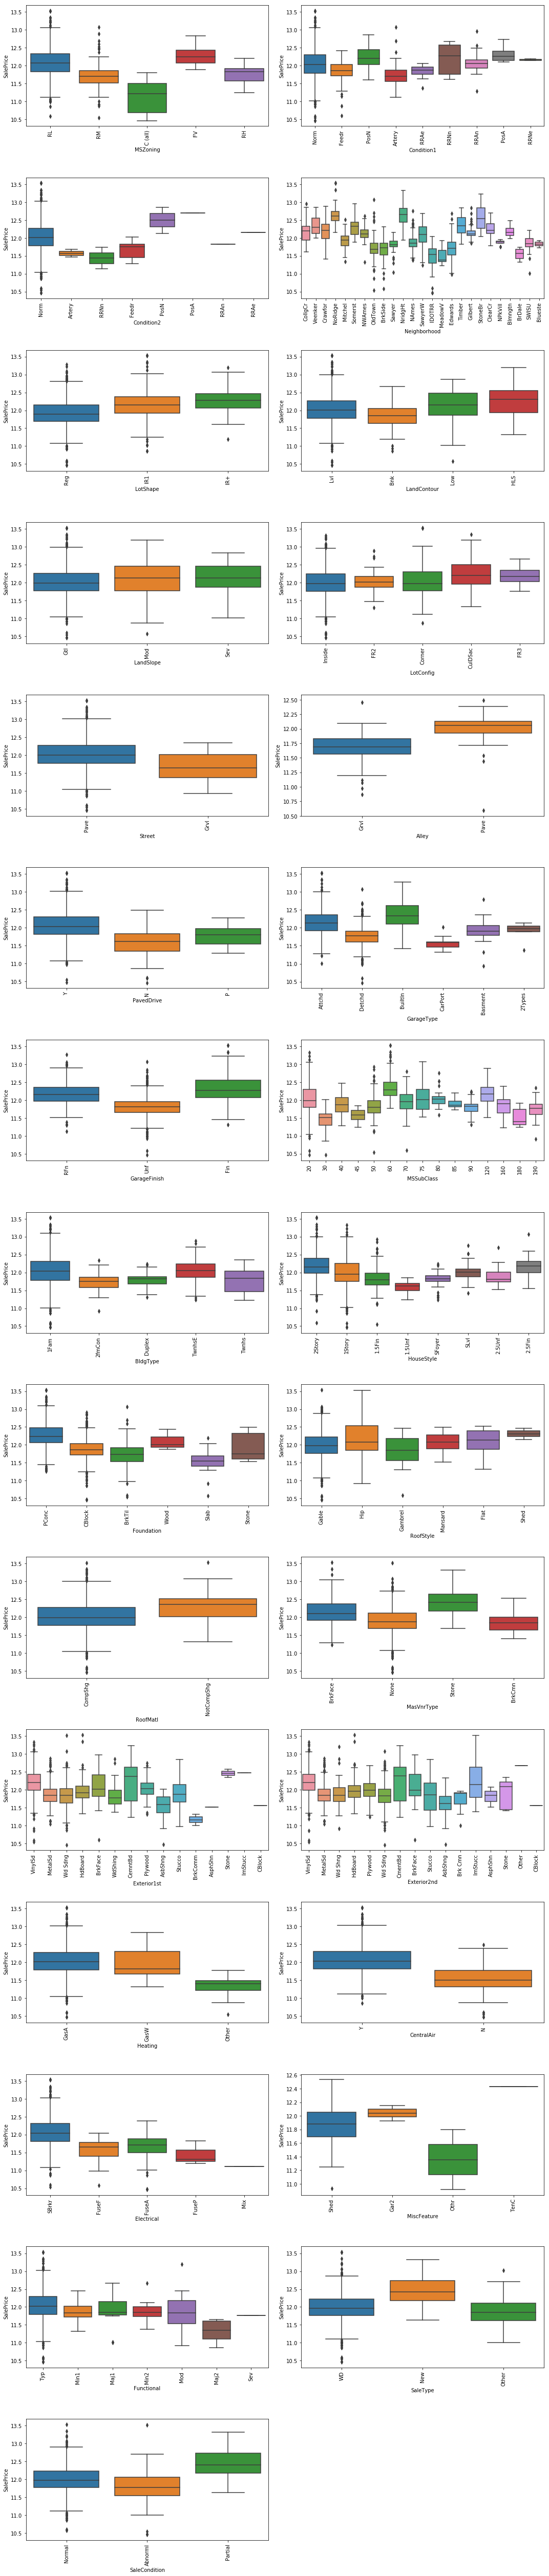

In [23]:
boxplots(df, nominal_features, int(len(nominal_features)/2)+1 ,2)

In [16]:
ordinal_features = ['OverallQual','OverallCond','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',\
 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond',\
 'Fence', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold']

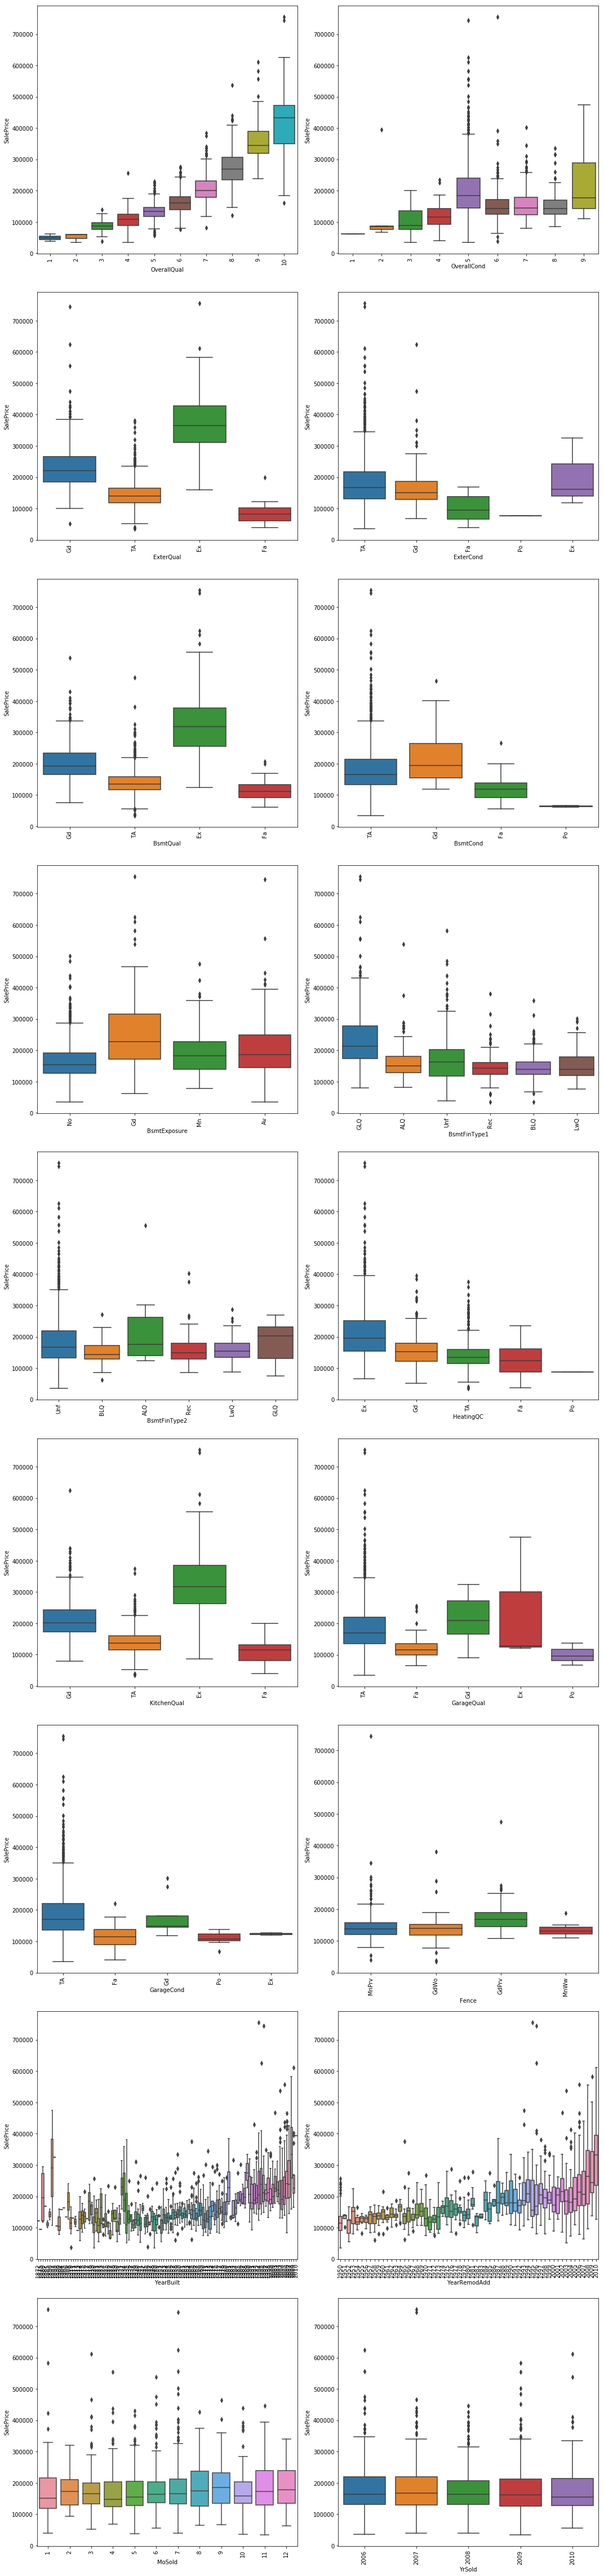

In [306]:
boxplots(df, ordinal_features, int(len(ordinal_features)/2)+1 ,2)

#### Data Pre - Processing
It mainly means 
 - Deal with missing data
 - Deal with outliers
 - Deal with categorical data
 - Scaling the features

##### Dealing with missing data

In [17]:
df[continuous_features].isnull().sum()

SalePrice          0
LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
dtype: int64

In [18]:
df[discrete_features].isna().sum()

BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
dtype: int64

In [19]:
df[nominal_features].isna().sum()

MSZoning            0
Condition1          0
Condition2          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
LotConfig           0
Street              0
Alley            1369
PavedDrive          0
GarageType         81
GarageFinish       81
MSSubClass          0
BldgType            0
HouseStyle          0
Foundation          0
RoofStyle           0
RoofMatl            0
MasVnrType          8
Exterior1st         0
Exterior2nd         0
Heating             0
CentralAir          0
Electrical          1
MiscFeature      1406
Functional          0
SaleType            0
SaleCondition       0
dtype: int64

In [20]:
df[ordinal_features].isna().sum()

OverallQual        0
OverallCond        0
ExterQual          0
ExterCond          0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
HeatingQC          0
KitchenQual        0
GarageQual        81
GarageCond        81
Fence           1179
YearBuilt          0
YearRemodAdd       0
MoSold             0
YrSold             0
dtype: int64

In [21]:
# Imputing Missing Values
df['GarageType'].fillna("No Garage", inplace = True)
df['Fence'].fillna("No Fence", inplace = True)
df['MiscFeature'].fillna("No MiscFeature", inplace = True)
df['Alley'].fillna("No Alley", inplace = True)
df['GarageQual'].fillna("None", inplace = True)
df['GarageCond'].fillna("None", inplace = True)
df['GarageFinish'].fillna("None", inplace = True)

In [23]:
df.drop('GarageYrBlt', axis=1, inplace = True)

In [24]:
df["BsmtQual"].fillna("None",inplace = True)
df["BsmtCond"].fillna("None",inplace = True)
df["BsmtExposure"].fillna("None",inplace = True)
df["BsmtFinType1"].fillna("None",inplace = True)
df["BsmtFinType2"].fillna("None",inplace = True)

In [25]:
df[df.index == 948][["BsmtExposure","BsmtCond","BsmtFinSF1","BsmtFinType1",\
                     "BsmtFinSF2", "BsmtFinType2", "BsmtUnfSF", "TotalBsmtSF"]]

,BsmtExposure,BsmtCond,BsmtFinSF1,BsmtFinType1,BsmtFinSF2,BsmtFinType2,BsmtUnfSF,TotalBsmtSF
948,None,TA,0,Unf,0,Unf,936,936


> For the observation having *Id 948*, we can check which is the most common value for the "BsmtExposure" variable for other observations having the same values of related variables.

In [26]:
df[(df["BsmtCond"] == 'TA')& (df['BsmtFinType1'] == "Unf")& (df["BsmtFinType2"] == 'Unf')]\
['BsmtExposure'].value_counts()

No      312
Av       41
Mn       24
Gd       10
None      1
Name: BsmtExposure, dtype: int64

> We can assume that the Id 948 has an 'Normal' basement exposure

In [27]:
df.at[948, "BsmtExposure"] = "No"

In [28]:
df[df.index == 332][["BsmtExposure","BsmtCond","BsmtFinSF1","BsmtFinType1",\
                     "BsmtFinSF2", "BsmtFinType2", "BsmtUnfSF", "TotalBsmtSF"]]

,BsmtExposure,BsmtCond,BsmtFinSF1,BsmtFinType1,BsmtFinSF2,BsmtFinType2,BsmtUnfSF,TotalBsmtSF
332,No,TA,1124,GLQ,479,None,1603,3206


> For the observation having *Id 332*, we can check which is the most common value for the "BsmtFinType2" variable for other observations having the same vaules of related variables.

In [29]:
df[(df["BsmtExposure"] == 'No')&(df["BsmtCond"] == 'TA')& (df['BsmtFinType1'] == "GLQ")]\
['BsmtFinType2'].value_counts()

Unf     164
Rec       5
LwQ       3
BLQ       1
None      1
ALQ       1
Name: BsmtFinType2, dtype: int64

> We can assume that the *Id 332* has an 'unfinished' basement

In [30]:
df.at[332, "BsmtFinType2"] = "Unf"

> For the variable **Electrical**, which has only one missing value, we can impute a value using deduction.
We can check the year this property has been built and which kind of electrical systems the other properties built the same year have.

In [31]:
df[df['Electrical'].isna()]['YearBuilt']

1379    2006
Name: YearBuilt, dtype: int64

In [32]:
df[df['YearBuilt'] == 2006]['Electrical'].value_counts()

SBrkr    66
Name: Electrical, dtype: int64

> Since all those properties have a Standard Circuit Breakers & Romex, we can assume that our record missing this value has the same kind of electrical circuit.

In [33]:
df['Electrical'].fillna("SBrkr", inplace = True)

> For **MasVnrType** column we impute "None" and for the related **MasVnrArea** we impute 0.0

In [34]:
df['MasVnrType'].fillna("No MasVnr", inplace = True)

In [35]:
df['MasVnrArea'].fillna(0.0, inplace = True)

> For the **LotFrontage** variable, we can impute missing values using the pandas .interpolate method. Interpolation is a mathematical method that adjusts a function to the data and uses this function to extrapolate the missing data.  
In this case a good approximation may be a linear method

In [36]:
df['LotFrontage'].interpolate(method='linear', inplace = True)

> For **FireplacesQu** and **PoolQC** columns, since almost all values are missing we can drop the whole column.

In [37]:
df.drop(["FireplacesQu", "PoolQC"], axis = 1, inplace = True)

After these operations, the former list of ordinal features in our dataset has changed (we have removed GarageYrBlt, FireplacesQu and PoolQC variables) and we need to update it since we will use it again in the next step.

In [38]:
ordinal_features = ['OverallQual','OverallCond','ExterQual','ExterCond', 'BsmtQual', 
'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
'HeatingQC','KitchenQual', 'GarageQual', 'GarageCond', 
'Fence', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold' ]

##### Dealing with Outliers

For the SalePrice observation which are below and above 1st and 99th percentile are dropped

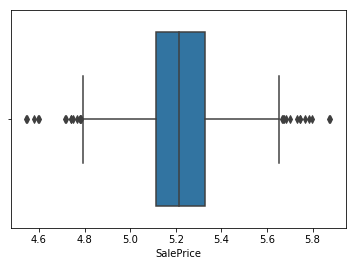

In [120]:
sns.boxplot(df['SalePrice']);

In [137]:
# defining a function returning for a feature the 1st and the 99th percentile
def outlier_detection(datacolumn):
    global Q1
    global Q99
    sorted(datacolumn)
    Q1,Q99 = np.percentile(datacolumn , [1,99])
    return Q1,Q99

In [138]:
# Printing out the IQR's boundaries and the nb of observations having values above or below
print("SalePrice:", outlier_detection(df['SalePrice']),
          "\nNb of outliers: ", len(df[(df["SalePrice"] < Q1) | (df["SalePrice"] > Q99)]))


SalePrice: (4.791074323486226, 5.645968542184301) 
Nb of outliers:  30


In [140]:
# Removing outliers from the dataset
df.drop(df[(df.SalePrice > Q99) | (df.SalePrice < Q1) ].index , inplace=True)

##### Encoding Categorical Features

Examing the distribution of categories for our nominal features.

In [49]:
for v in nominal_features:
    print(df[v].value_counts())

Reg    925
IR1    484
IR+     51
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64
Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmC

Typecasting categorical features to a **category dtype**

In [142]:
df[nominal_features] = df[nominal_features].astype('category')

In [143]:
df[ordinal_features] = df[ordinal_features].astype('category')

In [144]:
df[nominal_features].dtypes.head(3)

MSZoning      category
Condition1    category
Condition2    category
dtype: object

In [145]:
df[ordinal_features].dtypes.head(3)

OverallQual    category
OverallCond    category
ExterQual      category
dtype: object

> When encoding **ordinal features** (the categories of which have an intrinsec order) we need to make sure that the learning algorithm takes into account the order of the categories. For that we have to map the categorical values to integer values manually.

We can use a dictionary-mapping approach along with the *replace()*function.

Note: Some of the ordinal features ('OverallQual','OverallCond', 'YearBuilt','YearRemodAdd','MoSold' and 'YrSold') do not need encoding since they are already in a numeric format.

For the other we proceed as shown below

In [146]:
mapping_dict = {
"ExterQual": {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1},\
"ExterCond": {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1},\
"BsmtQual":{'Ex':4, 'Gd':3, 'TA':2, 'Fa':1,'None':0},\
"BsmtCond":{'Gd':4, 'TA':3, 'Fa':2,'Po':1, 'None':0},\
"BsmtExposure":{'Av':4, 'Gd':3, 'Mn':2, 'No':1, 'None':0},\
"BsmtFinType1":{'GLQ':6,'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2,'Unf':1,'None':0},\
"BsmtFinType2":{'GLQ':6,'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2,'Unf':1,'None':0},\
"HeatingQC" :{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1},\
"KitchenQual":{'Ex':4, 'Gd':3, 'TA':2, 'Fa':1},\
"GarageQual":{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'None':0},\
"GarageCond":{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'None':0},\
"Fence":{'GdPrv':4,'MnPrv':3, 'GdWo':2,'MnWw':1, 'No Fence':0}
}


In [147]:
df.replace(mapping_dict, inplace=True)

> To map **nominal features** (i.e. variables having multiple categories without any intrinsic ordering to them) we can use  a technique called one-hot encoding.

In [148]:
nominal_features_dummies = pd.get_dummies(df[nominal_features], drop_first=True)

After creating our dummy variables, we concatenate them to the dataframe and we remove the original columns.

In [149]:
df = pd.concat([df, nominal_features_dummies], axis = 1)

In [150]:
df.drop(nominal_features, axis = 1, inplace = True)

In [151]:
df.drop(ordinal_features, axis = 1, inplace = True)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1459
Columns: 188 entries, SalePrice to SaleCondition_Partial
dtypes: float64(3), int64(27), uint8(158)
memory usage: 567.0 KB


## Splitting Data Into Train and Test Set

In [197]:
y_train = np.array(df['SalePrice'])
X_train = np.array(df.iloc[:,2:])

### Scaling Features

In [153]:
# importing sklearn module for preprocessing
from sklearn import preprocessing

# create an object of the class 'RobustScaler'
scaler = preprocessing.RobustScaler()


In [198]:
X_train_scaled = scaler.fit_transform(X_train)